# Airbnb American Cities

Dataset: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities?resource=download

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'/Users/zhanebennett/Downloads/archive-2/AB_NYC_2019.csv')

In [5]:
%matplotlib inline

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [7]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [8]:
df.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [9]:
df.shape

(48895, 16)

In [10]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [11]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [12]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [13]:
df['neighbourhood'].unique().tolist()

['Kensington',
 'Midtown',
 'Harlem',
 'Clinton Hill',
 'East Harlem',
 'Murray Hill',
 'Bedford-Stuyvesant',
 "Hell's Kitchen",
 'Upper West Side',
 'Chinatown',
 'South Slope',
 'West Village',
 'Williamsburg',
 'Fort Greene',
 'Chelsea',
 'Crown Heights',
 'Park Slope',
 'Windsor Terrace',
 'Inwood',
 'East Village',
 'Greenpoint',
 'Bushwick',
 'Flatbush',
 'Lower East Side',
 'Prospect-Lefferts Gardens',
 'Long Island City',
 'Kips Bay',
 'SoHo',
 'Upper East Side',
 'Prospect Heights',
 'Washington Heights',
 'Woodside',
 'Brooklyn Heights',
 'Carroll Gardens',
 'Gowanus',
 'Flatlands',
 'Cobble Hill',
 'Flushing',
 'Boerum Hill',
 'Sunnyside',
 'DUMBO',
 'St. George',
 'Highbridge',
 'Financial District',
 'Ridgewood',
 'Morningside Heights',
 'Jamaica',
 'Middle Village',
 'NoHo',
 'Ditmars Steinway',
 'Flatiron District',
 'Roosevelt Island',
 'Greenwich Village',
 'Little Italy',
 'East Flatbush',
 'Tompkinsville',
 'Astoria',
 'Clason Point',
 'Eastchester',
 'Kingsbridge',


### A private room in Manhattan below the average price of NYC

In [14]:
neighbor = ["Manhattan"]
mask = df['neighbourhood_group'].isin(neighbor)
room = ["Private room"]
mask2 = df['room_type'].isin(room)
mask3 = df['price'] < df['price'].mean()

df[mask & mask2 & mask3]

id                                               name    host_id  \
2          3647                THE VILLAGE OF HARLEM....NEW YORK !       4632   
7          5178                   Large Furnished Room Near B'way        8967   
8          5203                 Cozy Clean Guest Room - Family Apt       7490   
11         5441                    Central Manhattan/near Broadway       7989   
13         6021   Wonderful Guest Bedroom in Manhattan for SINGLES      11528   
...         ...                                                ...        ...   
48876  36478357    Cozy, Air-Conditioned Private Bedroom in Harlem  177932088   
48883  36482416       Sunny Bedroom NYC! Walking to Central Park!!  131529729   
48885  36482809    Stunning Bedroom NYC! Walking to Central Park!!  131529729   
48888  36484087  Spacious Room w/ Private Rooftop, Central loca...  274321313   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen   68119814   

        host_name neighbourhood_group    neighbourhood  latitude  longitude  \
2       Elisabeth           Manhattan           Harlem  40.80902  -73.94190   
7        Shunichi           Manhattan   Hell's Kitchen  40.76489  -73.98493   
8       MaryEllen           Manhattan  Upper West Side  40.80178  -73.96723   
11           Kate           Manhattan   Hell's Kitchen  40.76076  -73.98867   
13        Claudio           Manhattan  Upper West Side  40.79826  -73.96113   
...           ...                 ...              ...       ...        ...   
48876      Joseph           Manhattan           Harlem  40.80953  -73.95410   
48883     Kendall           Manhattan      East Harlem  40.79755  -73.93614   
48885     Kendall           Manhattan      East Harlem  40.79633  -73.93605   
48888         Kat           Manhattan   Hell's Kitchen  40.76392  -73.99183   
48894  Christophe           Manhattan   Hell's Kitchen  40.76404  -73.98933   

          room_type  price  minimum_nights  number_of_reviews last_review  \
2      Private room    150               3                  0         NaN   
7      Private room     79               2                430  2019-06-24   
8      Private room     79               2                118  2017-07-21   
11     Private room     85               2                188  2019-06-23   
13     Private room     85               2                113  2019-07-05   
...             ...    ...             ...                ...         ...   
48876  Private room     60               1                  0         NaN   
48883  Private room     75               2                  0         NaN   
48885  Private room     75               2                  0         NaN   
48888  Private room    125               4                  0         NaN   
48894  Private room     90               7                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
2                    NaN                               1               365  
7                   3.47                               1               220  
8                   0.99                               1                 0  
11                  1.50                               1                39  
13                  0.91                               1               333  
...                  ...                             ...               ...  
48876                NaN                               1                26  
48883                NaN                               2               364  
48885                NaN                               2               353  
48888                NaN                               1                31  
48894                NaN                               1                23  

[6989 rows x 16 columns]

## Histogram

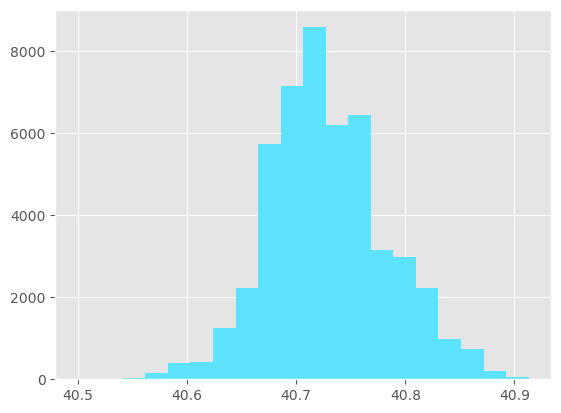

In [15]:
hist = plt.hist(df['latitude'], bins=20, color="#5ee3ff")
plt.show()

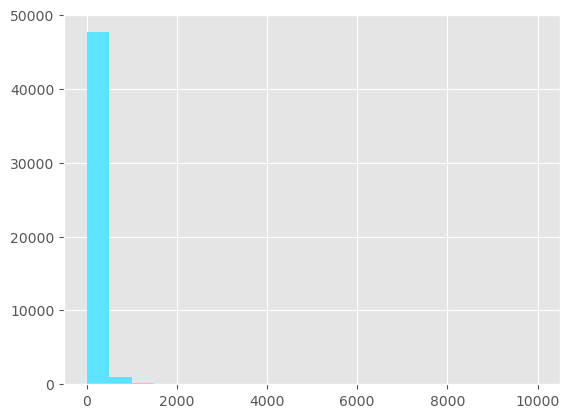

In [16]:
hist = plt.hist(df['price'], bins=20, color="#5ee3ff")
plt.show()

In [17]:
outliers = df[['price']].dropna()
outliers = outliers.loc[outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [18]:
outliers

price
0        149
1        225
2        150
3         89
4         80
...      ...
48890     70
48891     40
48892    115
48893     55
48894     90

[48507 rows x 1 columns]

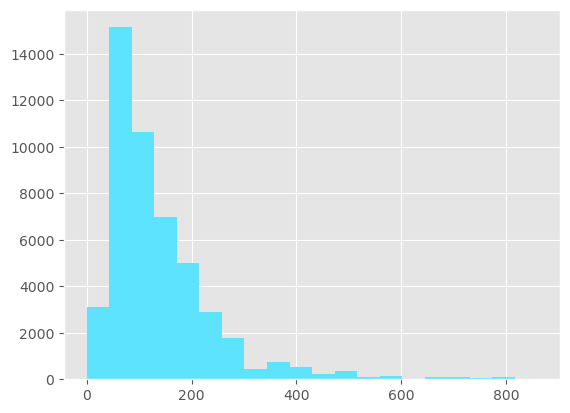

In [19]:
hist = plt.hist(outliers['price'], bins=20, color="#5ee3ff")
plt.show()

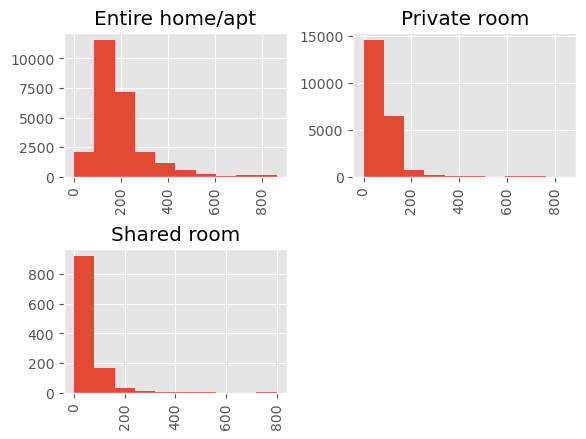

In [20]:
hist = outliers.price.hist(by=df.room_type)
#df.price.hist(by=df.neighbourhood, sharey= True)
plt.show()

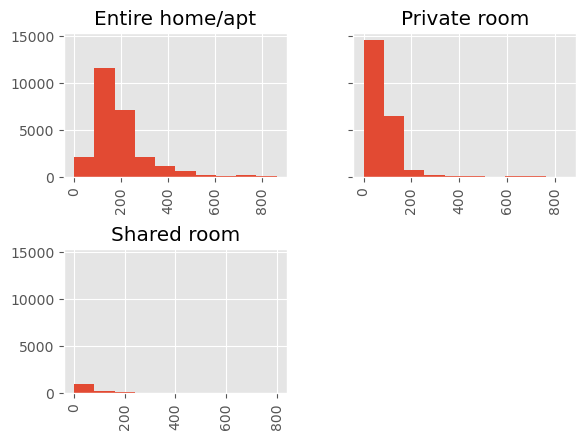

In [21]:
outliers.price.hist(by=df.room_type, sharey= True)
plt.show()

# Outliers

In [22]:
#Remove outliers for every variable

In [23]:
scatter_df = df[['price','calculated_host_listings_count', 'reviews_per_month', 'availability_365', 'number_of_reviews']]
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [24]:
scatter_df.shape
scatter_df

price  calculated_host_listings_count  reviews_per_month  \
0        149                               6               0.21   
1        225                               2               0.38   
4         80                               1               0.10   
5        200                               1               0.59   
6         60                               1               0.40   
...      ...                             ...                ...   
48782    129                               1               1.00   
48790     45                               6               1.00   
48799    235                               1               1.00   
48805    100                               1               2.00   
48852     30                               1               1.00   

       availability_365  number_of_reviews  
0                   365                  9  
1                   355                 45  
4                     0                  9  
5                   129                 74  
6                     0                 49  
...                 ...                ...  
48782               147                  1  
48790               339                  1  
48799                87                  1  
48805                40                  2  
48852                 1                  1  

[36661 rows x 5 columns]

In [25]:
df_no_outlier = scatter_df.merge(df, how='left', left_index=True, right_index=True, suffixes=['', '_y']
              ).\
sort_values(by='price', ascending=False)

In [26]:
df_no_outlier.shape

(36661, 21)

In [27]:
scatter_df.merge(df, how='left', left_index=True, right_index=True, suffixes=['', '_y']
              )[['price', 'neighbourhood']].\
sort_values(by='price', ascending=False)

price              neighbourhood
37341    860  Prospect-Lefferts Gardens
5351     860             Hell's Kitchen
19183    850                       SoHo
28150    850                    Tribeca
27600    850                     Harlem
...      ...                        ...
25795      0         Bedford-Stuyvesant
26866      0                   Bushwick
25778      0               Williamsburg
25794      0         Bedford-Stuyvesant
25433      0            East Morrisania

[36661 rows x 2 columns]

In [28]:
df_no_outlier.head()

price  calculated_host_listings_count  reviews_per_month  \
37341    860                               1               0.49   
5351     860                               1               0.67   
19183    850                               1               1.04   
28150    850                               1               0.76   
27600    850                               2               0.22   

       availability_365  number_of_reviews        id  \
37341                23                  4  29650402   
5351                365                 39   3861943   
19183               262                 32  15260962   
28150                36                 14  21948560   
27600               178                  4  21709727   

                                                    name   host_id  \
37341                     Landmarked Limestone Sanctuary  68198631   
5351                      Spacious Studio in Time Square  14733148   
19183   Luxury 2BR Penthouse in the hearth of Soho (Nyc)  26830685   
28150  Luxury Skyline Views! Best Panaromic Views Of ...  23001368   
27600                       DESIGNER TOWNHOUSE IN HARLEM    271527   

         host_name neighbourhood_group  ...  latitude  longitude  \
37341         Kate            Brooklyn  ...  40.66354  -73.95507   
5351         Susan           Manhattan  ...  40.76052  -73.99115   
19183  Gaia&Pietro           Manhattan  ...  40.72575  -74.00128   
28150        Sofia           Manhattan  ...  40.71735  -74.00605   
27600      Richard           Manhattan  ...  40.81023  -73.94142   

             room_type price_y  minimum_nights  number_of_reviews_y  \
37341  Entire home/apt     860               2                    4   
5351   Entire home/apt     860               4                   39   
19183  Entire home/apt     850               3                   32   
28150  Entire home/apt     850               2                   14   
27600  Entire home/apt     850               3                    4   

       last_review reviews_per_month_y  calculated_host_listings_count_y  \
37341   2019-04-28                0.49                                 1   
5351    2016-08-17                0.67                                 1   
19183   2019-06-24                1.04                                 1   
28150   2019-06-19                0.76                                 1   
27600   2018-11-24                0.22                                 2   

       availability_365_y  
37341                  23  
5351                  365  
19183                 262  
28150                  36  
27600                 178  

[5 rows x 21 columns]

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='reviews_per_month'>

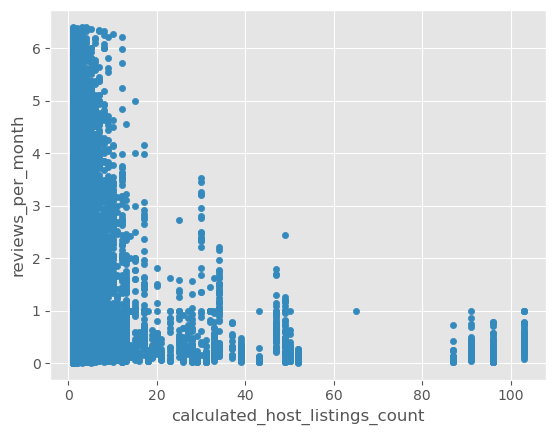

In [29]:
df_no_outlier.plot.scatter('calculated_host_listings_count', 'reviews_per_month')

<AxesSubplot:xlabel='neighbourhood_group'>

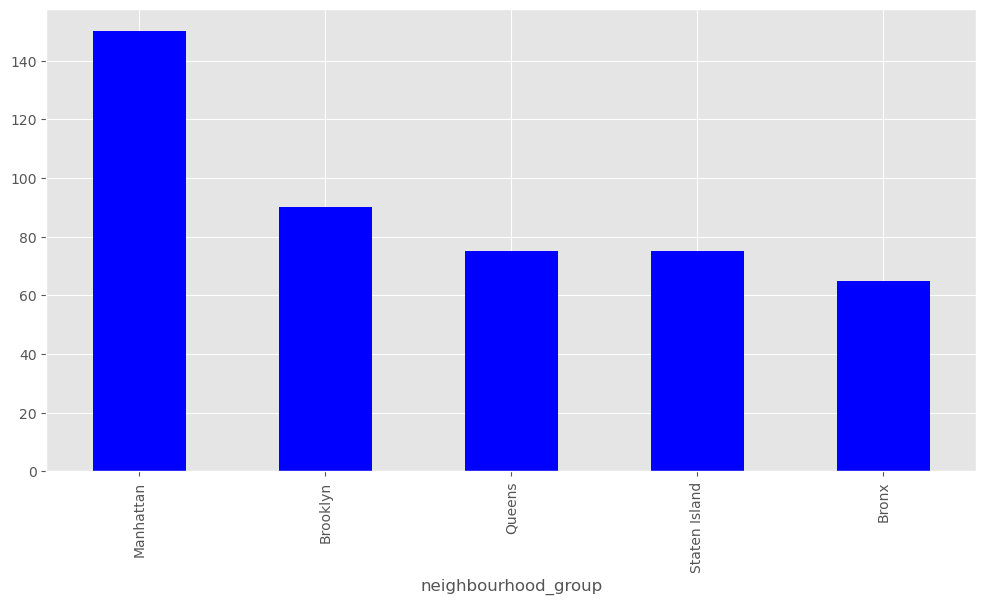

In [30]:
### BARPLOTS
plt.figure(figsize=(12,6))
df.groupby('neighbourhood_group')['price'].median().sort_values(ascending=False).plot.bar(color='b')

<AxesSubplot:xlabel='neighbourhood'>

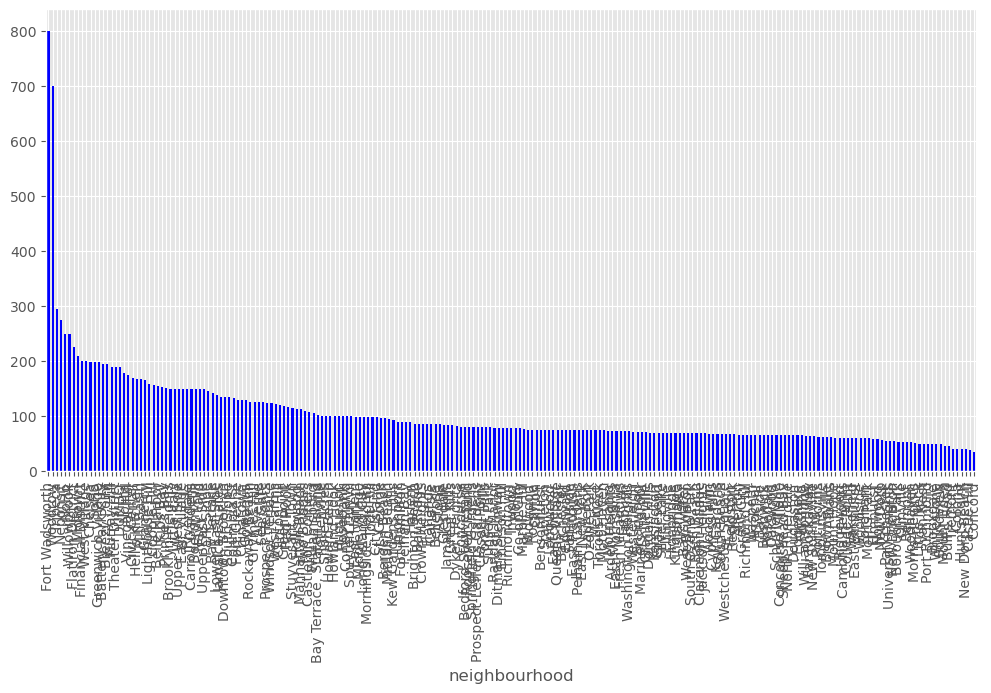

In [31]:
### BARPLOTS
plt.figure(figsize=(12,6))
df.groupby('neighbourhood')['price'].median().sort_values(ascending=False).plot.bar(color='b')

In [32]:
## BOXPLOT

In [33]:
df = df_no_outlier.copy()

Text(0, 0.5, 'price')

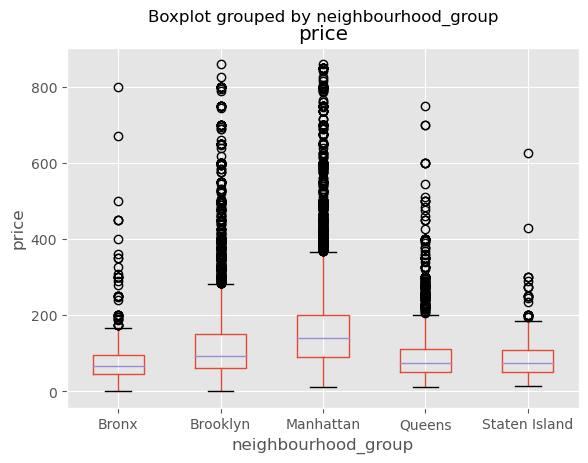

In [34]:
df_score = df[['neighbourhood_group', 'price']]
df_score.boxplot(by='neighbourhood_group', column='price')
plt.ylabel('price')

<AxesSubplot:xlabel='price', ylabel='Density'>

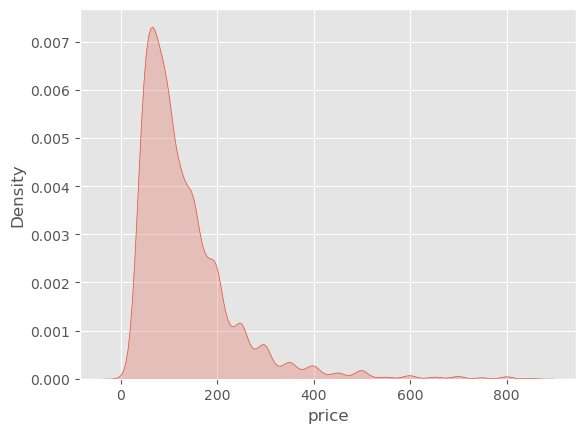

In [35]:
import seaborn as sns
sns.kdeplot(df['price'], shade=True, label='Estimated PDF of imdb score')

In [36]:
SexGrid = sns.FacetGrid(price, col='neighbourhood_group', hue="neighbourhood_group", palette="Set1", size=4)
SexGrid.map(sns.distplot, "price")

NameError: name 'price' is not defined

In [ ]:
Number of Reviews

In [ ]:
sns.jointplot(df['number_of_reviews'], df['price'])

In [ ]:
sns.boxplot(x='neighbourhood_group', y='price', data=df)

In [ ]:
sns.boxplot(x='neighbourhood', y='price', data=df)

<AxesSubplot:xlabel='room_type', ylabel='price'>

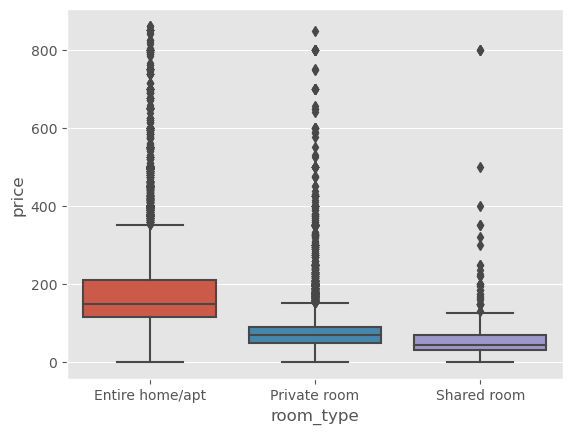

In [37]:
sns.boxplot(x='room_type', y='price', data=df)

<AxesSubplot:xlabel='room_type', ylabel='number_of_reviews'>

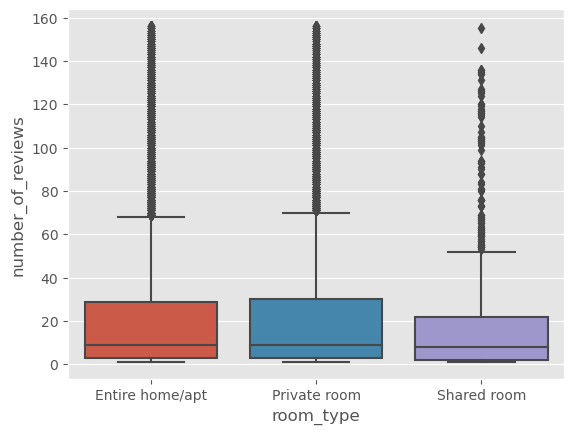

In [38]:
sns.boxplot(x='room_type', y='number_of_reviews', data=df)

<AxesSubplot:xlabel='room_type', ylabel='availability_365'>

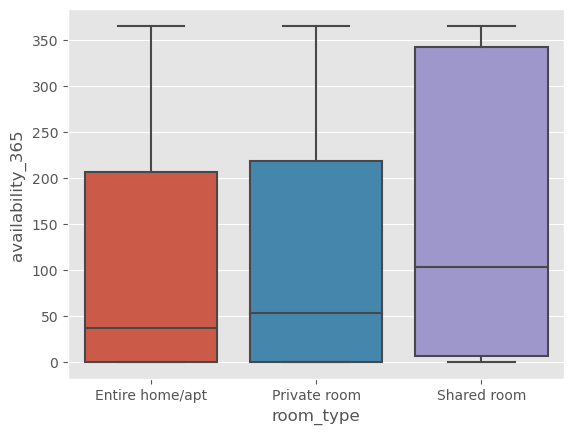

In [39]:
sns.boxplot(x='room_type', y='availability_365', data=df)

<AxesSubplot:xlabel='room_type', ylabel='calculated_host_listings_count'>

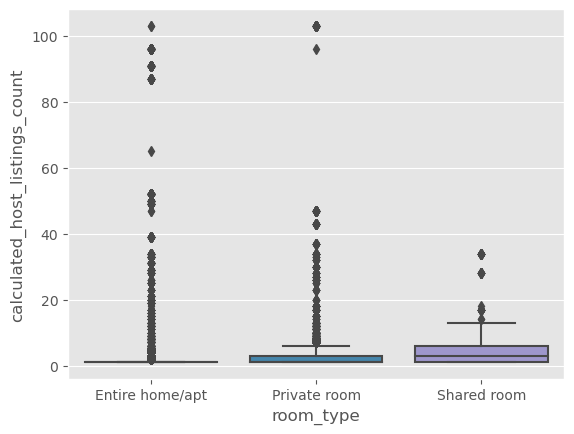

In [40]:
sns.boxplot(x='room_type', y='calculated_host_listings_count', data=df)

/Users/zhanebennett/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


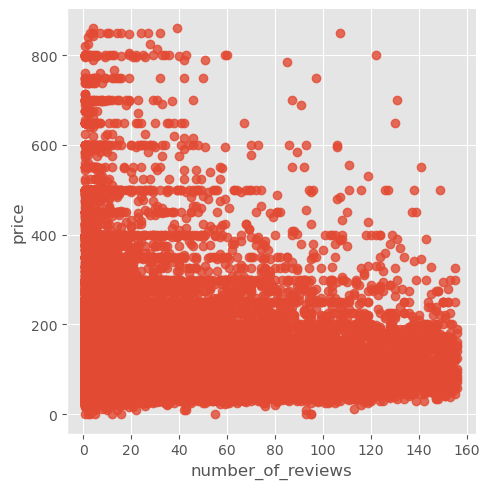

In [41]:
sns.lmplot("number_of_reviews", "price", df)

/Users/zhanebennett/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


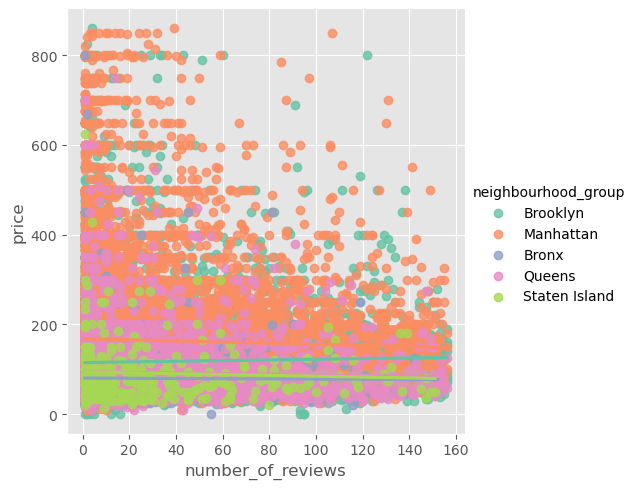

In [42]:
sns.lmplot("number_of_reviews", "price", df, hue="neighbourhood_group", palette="Set2")

/Users/zhanebennett/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


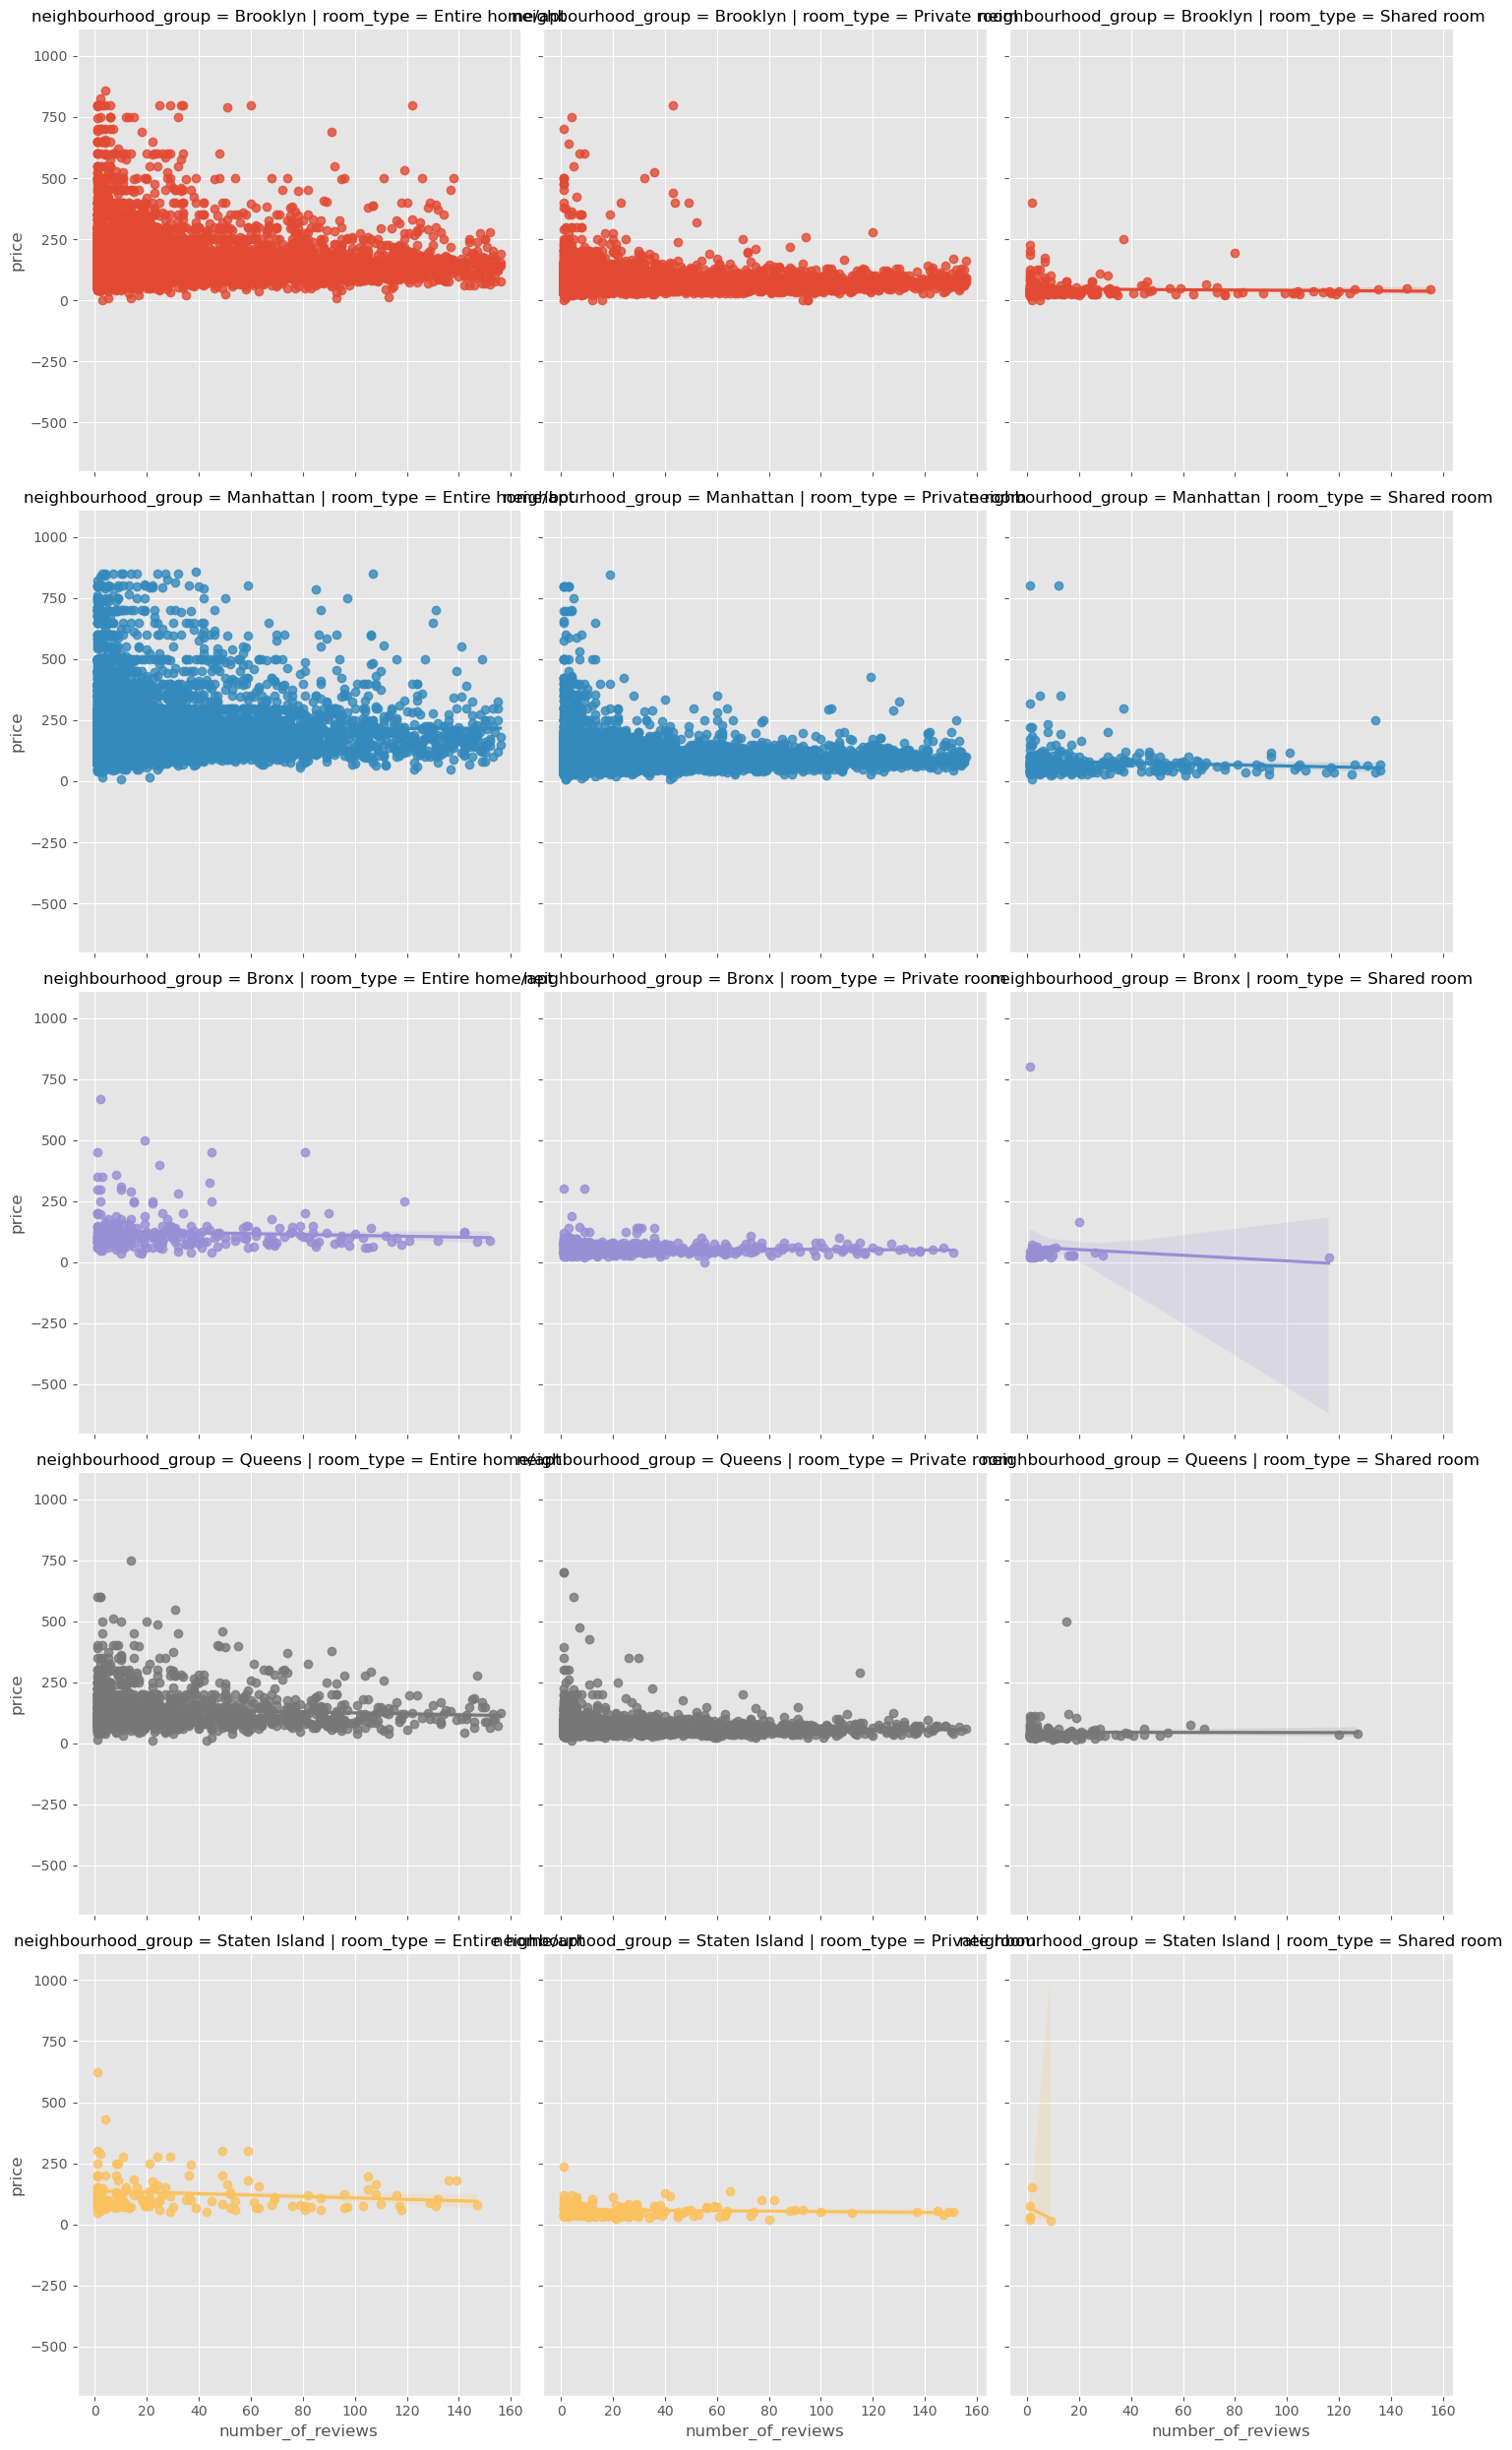

In [43]:
sns.lmplot("number_of_reviews", "price", df, hue="neighbourhood_group", col='room_type', row='neighbourhood_group')

/Users/zhanebennett/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


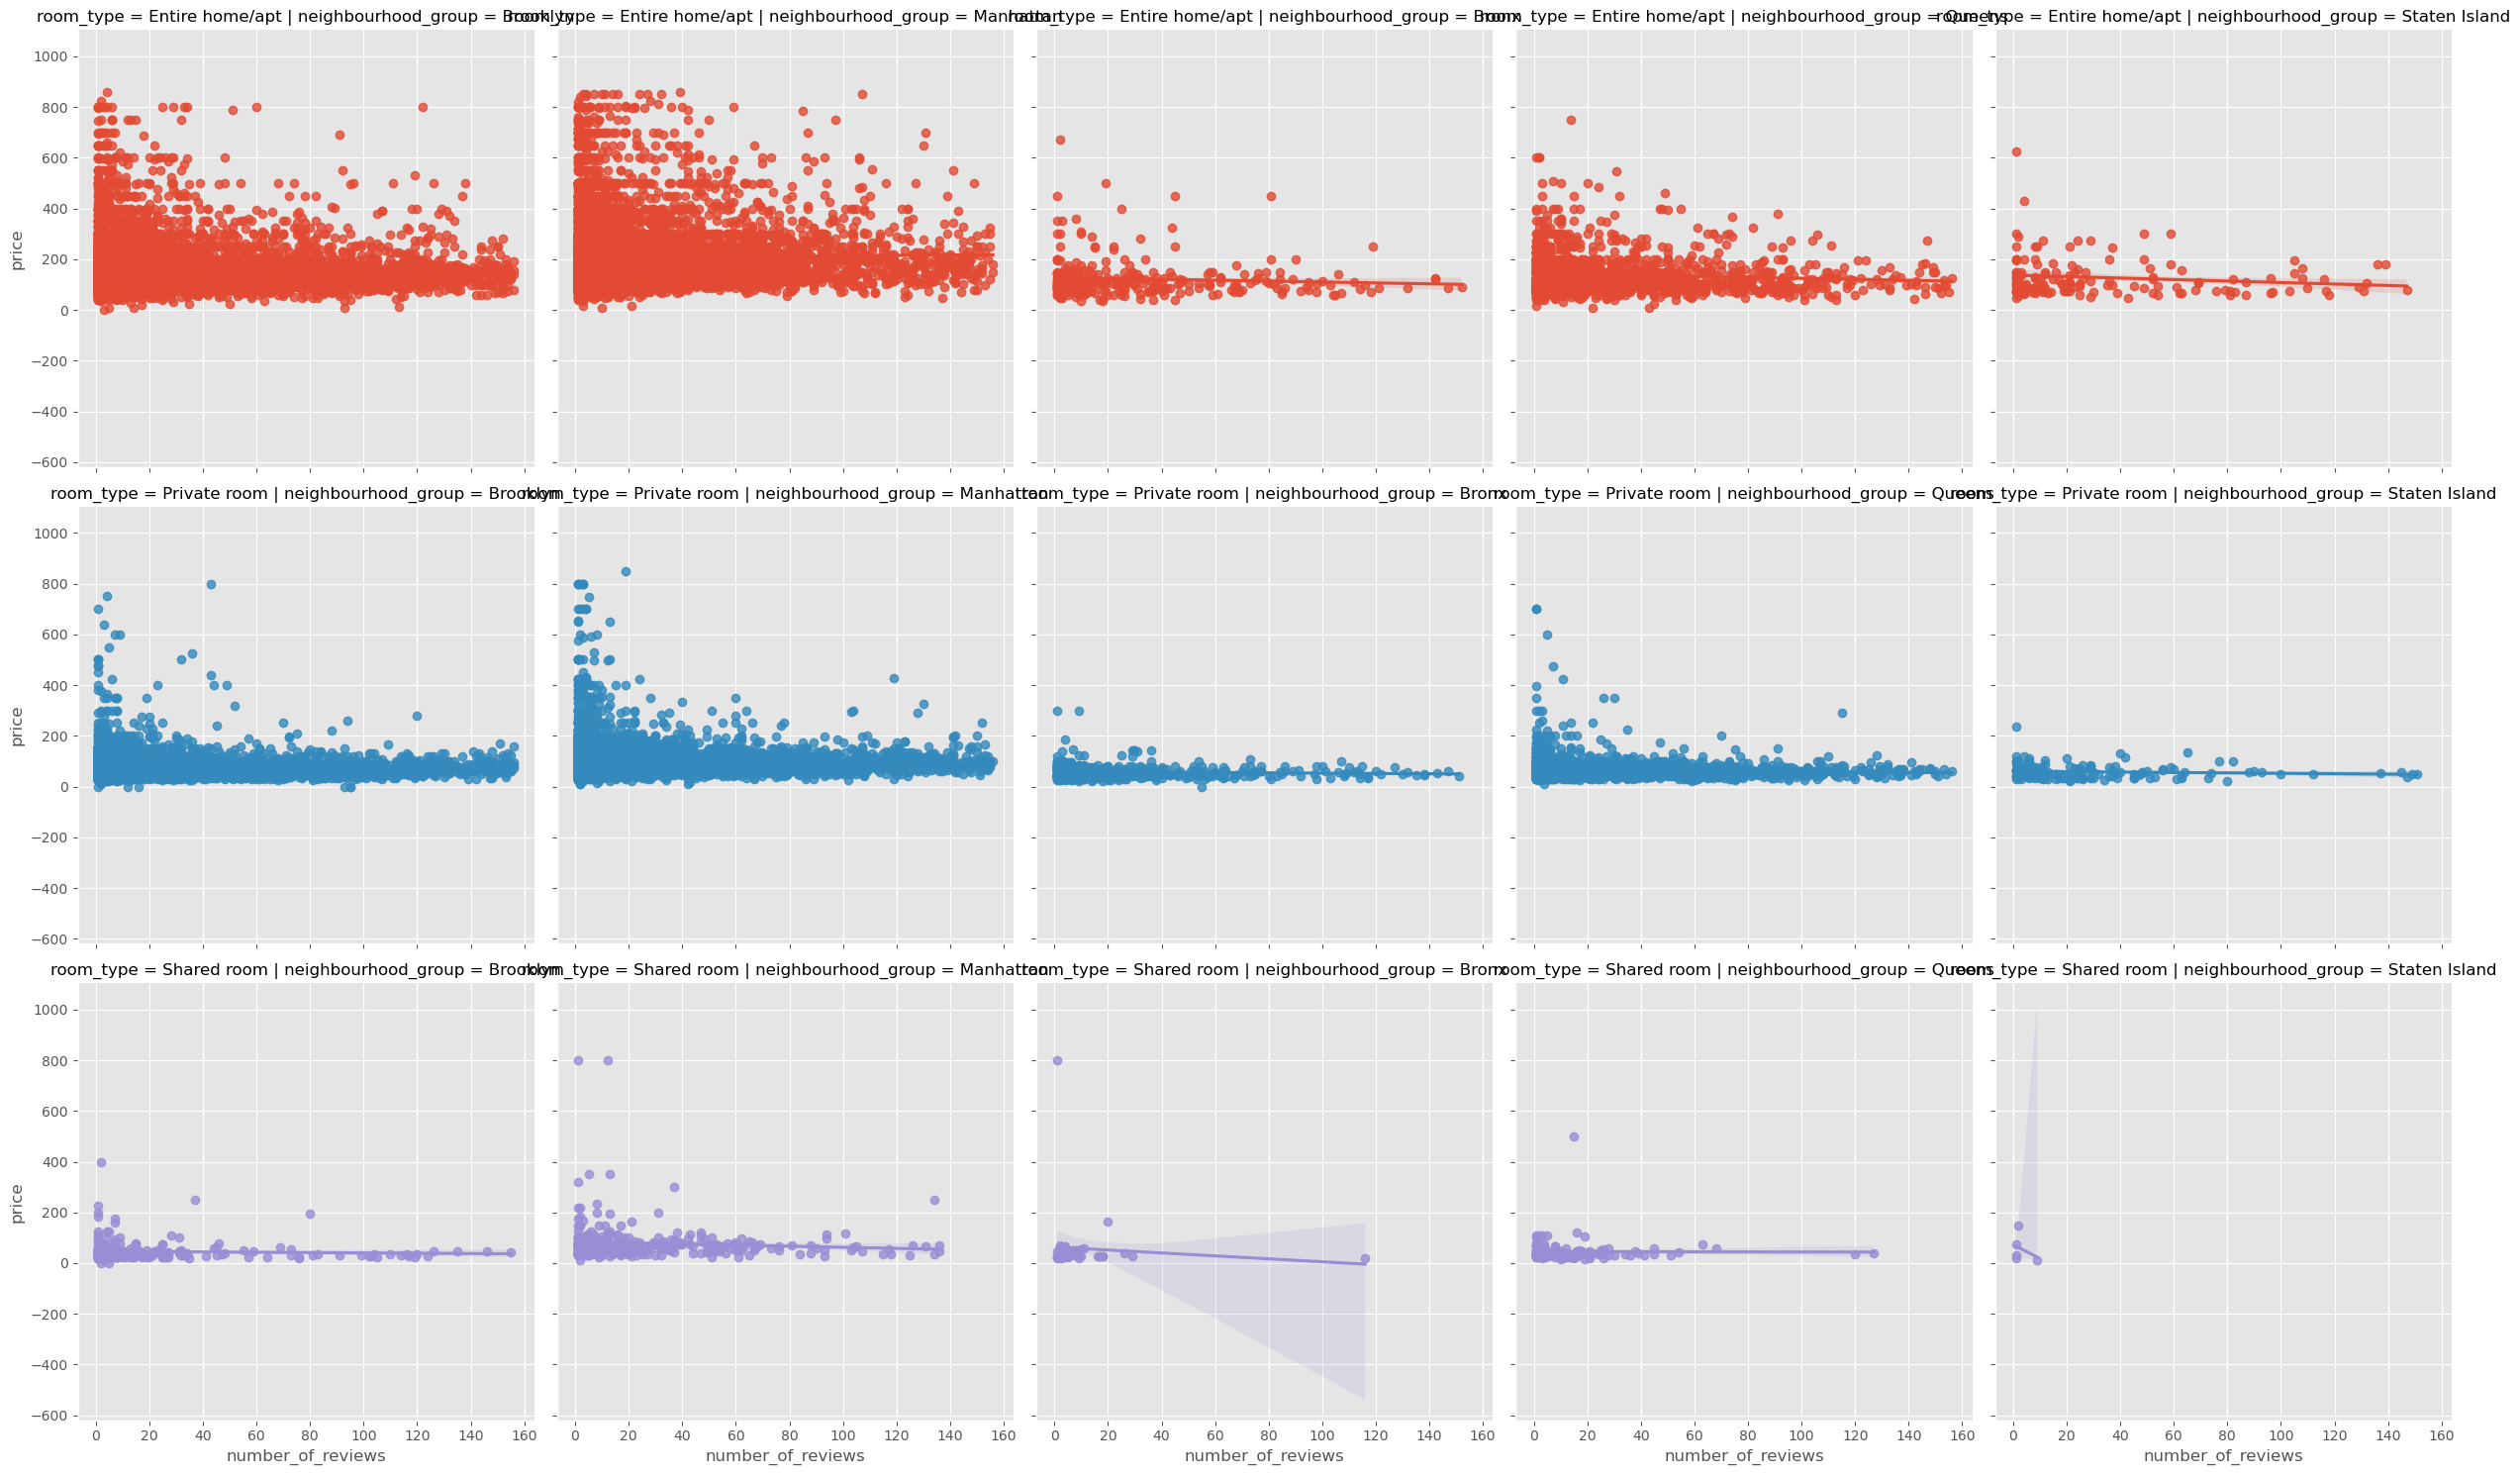

In [44]:
sns.lmplot("number_of_reviews", "price", df, hue="room_type", col='neighbourhood_group', row='room_type')

/Users/zhanebennett/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


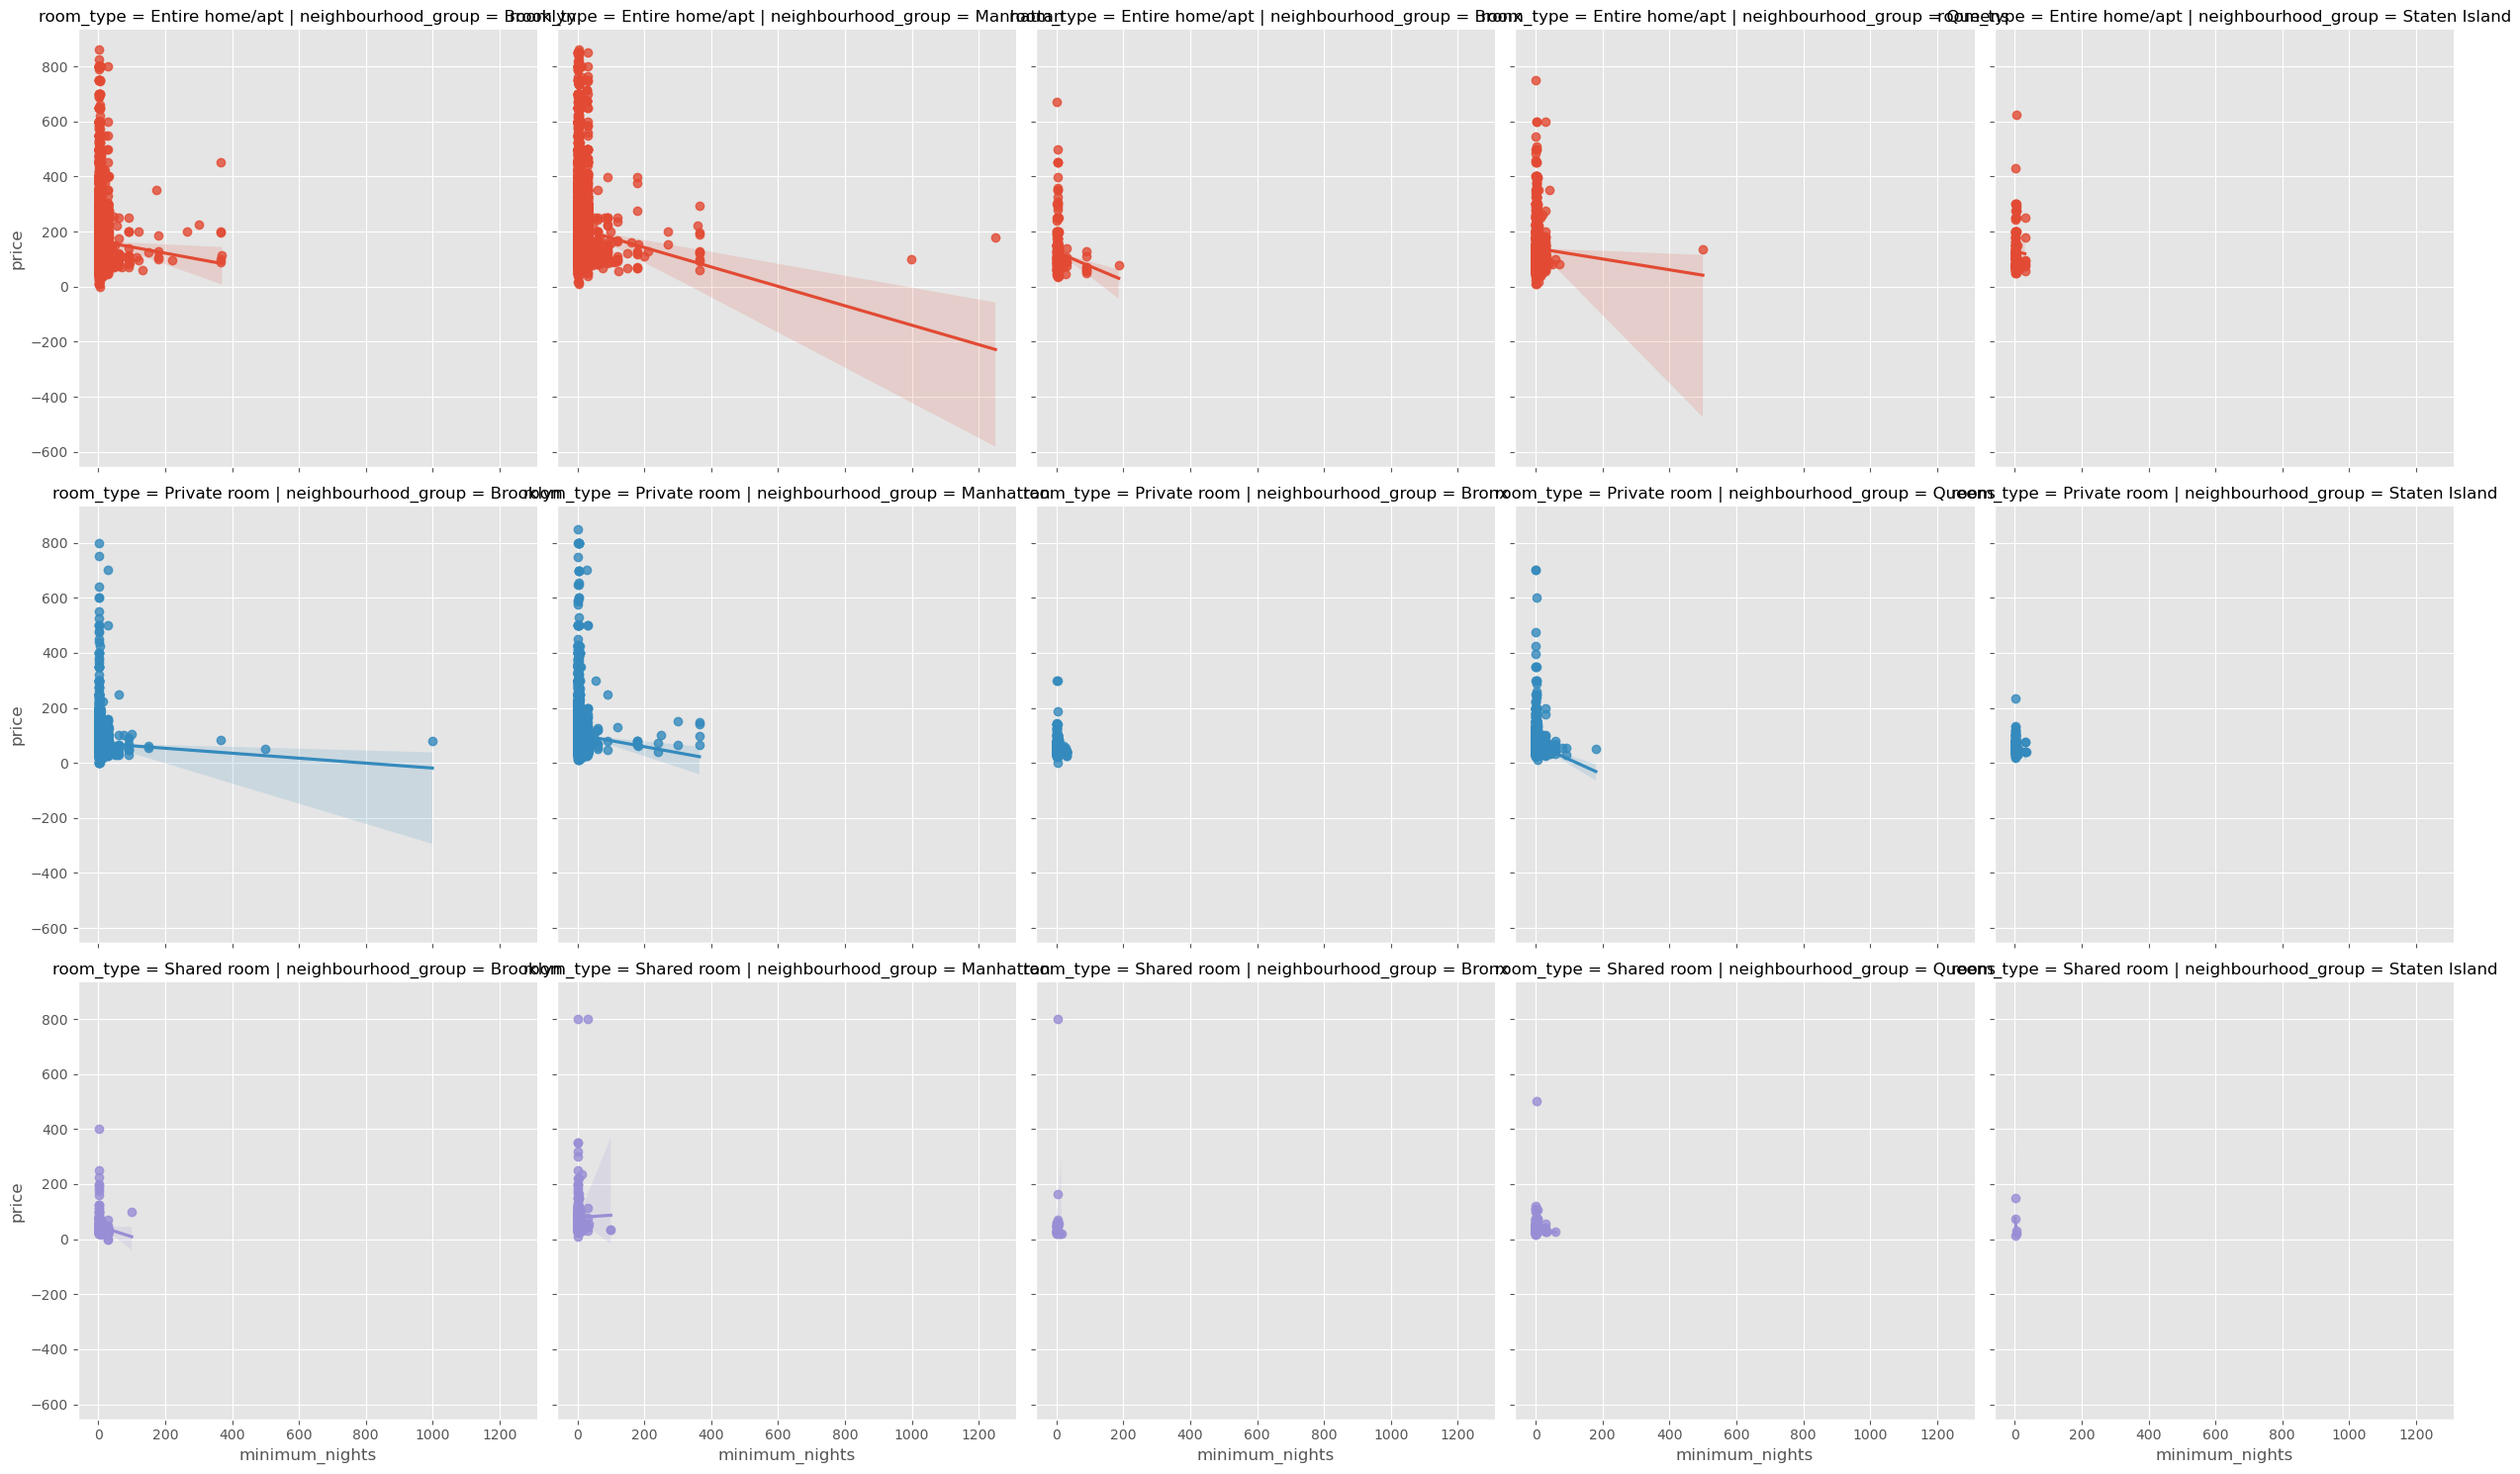

In [45]:
sns.lmplot("minimum_nights", "price", df, hue="room_type", col='neighbourhood_group', row='room_type')

/Users/zhanebennett/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


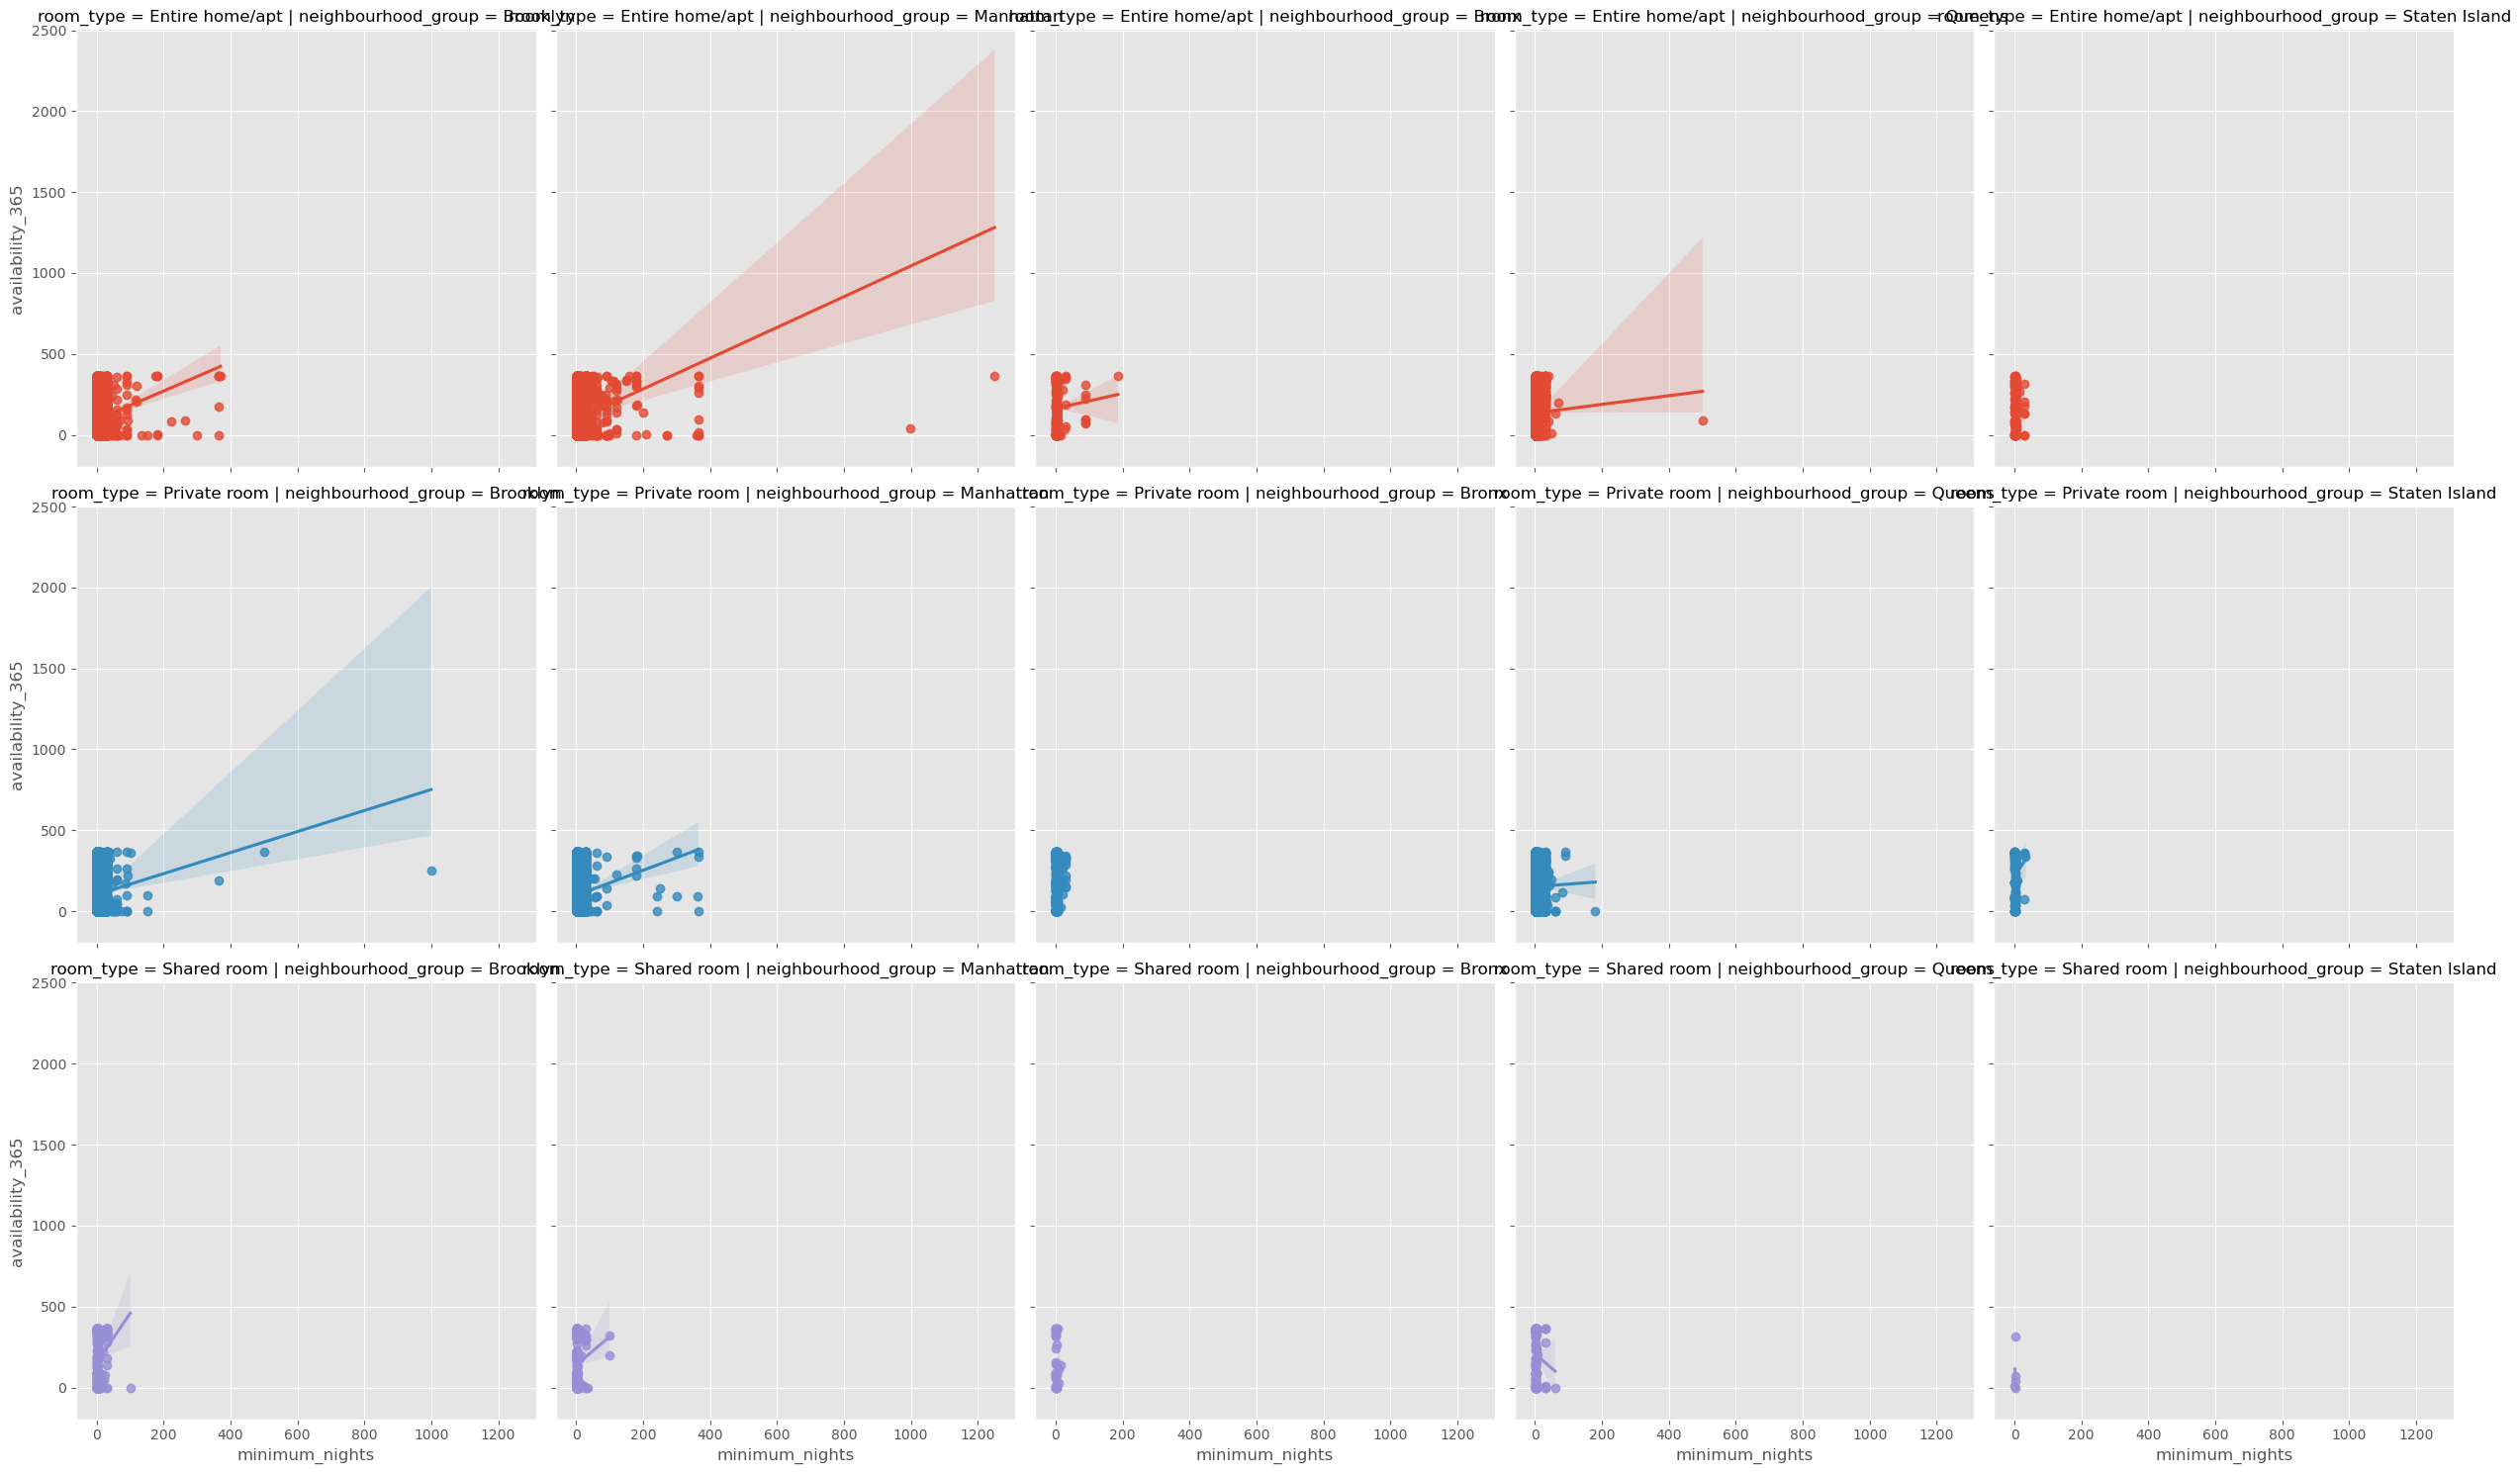

In [46]:
sns.lmplot("minimum_nights", "availability_365", df, hue="room_type", col='neighbourhood_group', row='room_type')

/Users/zhanebennett/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


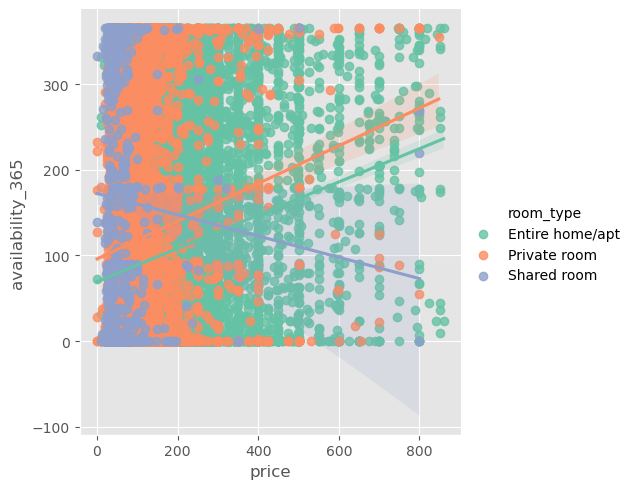

In [47]:
sns.lmplot("price", "availability_365", df, hue="room_type", palette="Set2")

/Users/zhanebennett/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


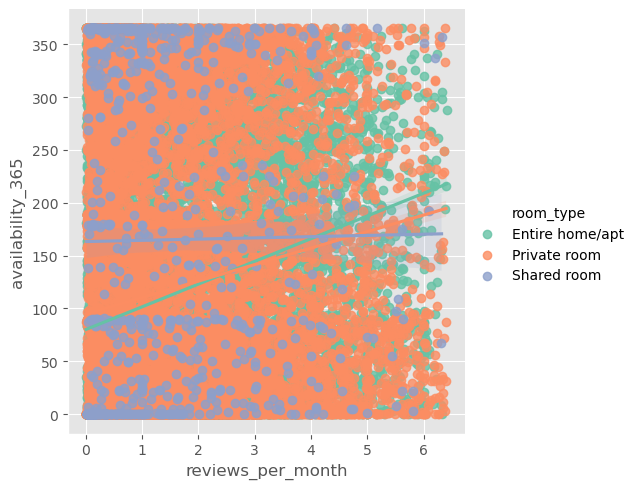

In [48]:
sns.lmplot("reviews_per_month", "availability_365", df, hue="room_type", palette="Set2")

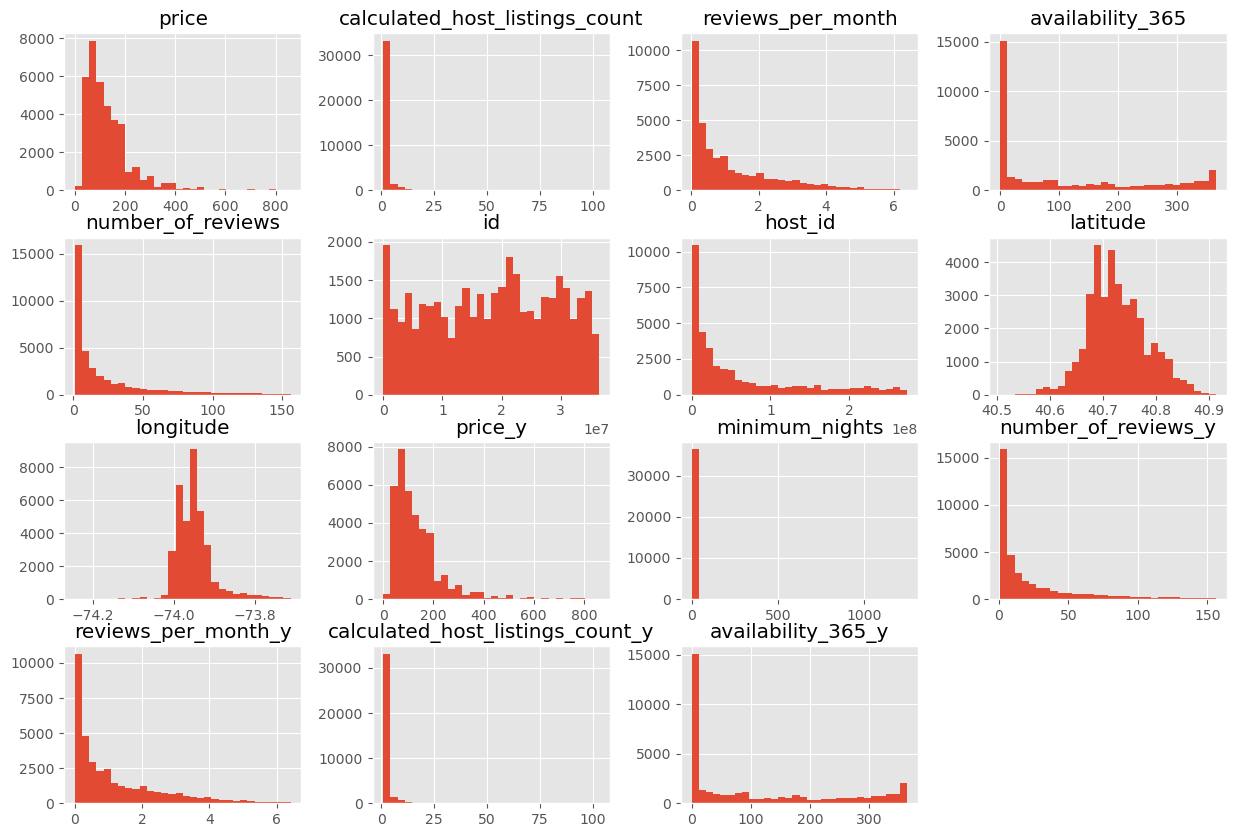

In [49]:
df.hist(bins=30, figsize=(15, 10));

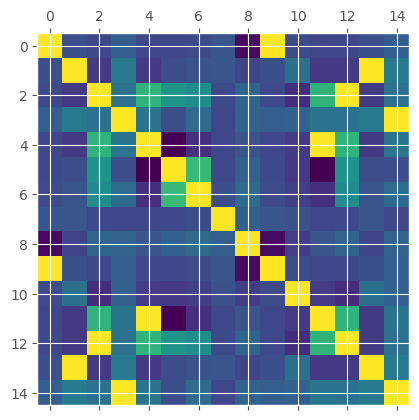

In [50]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

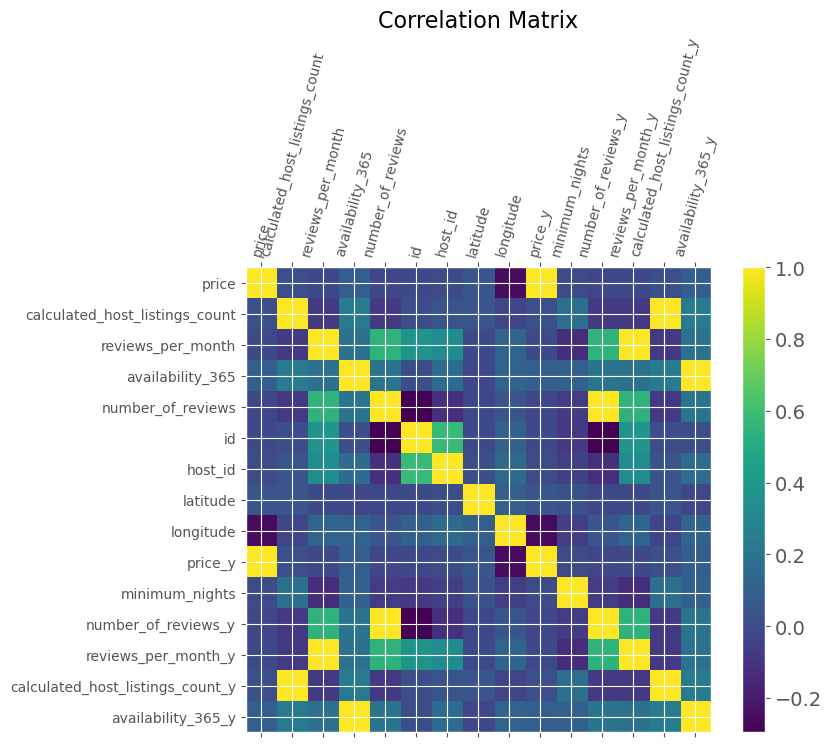

In [51]:
f = plt.figure(figsize=(8, 6))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=75)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [52]:
df.corr().unstack().sort_values().drop_duplicates()

number_of_reviews_y               id                                 -0.295159
price                             longitude                          -0.259175
reviews_per_month                 minimum_nights                     -0.123228
minimum_nights                    reviews_per_month_y                -0.123228
host_id                           number_of_reviews                  -0.115126
                                                                        ...   
id                                reviews_per_month                   0.375481
                                  reviews_per_month_y                 0.375481
reviews_per_month_y               number_of_reviews                   0.547696
id                                host_id                             0.575757
calculated_host_listings_count_y  calculated_host_listings_count_y    1.000000
Length: 67, dtype: float64

In [53]:
df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(20)

price                             price                               1.000000
host_id                           id                                  0.575757
reviews_per_month_y               number_of_reviews                   0.547696
id                                reviews_per_month_y                 0.375481
                                  reviews_per_month                   0.375481
host_id                           reviews_per_month_y                 0.333380
id                                number_of_reviews_y                 0.295159
price                             longitude                           0.259175
availability_365                  calculated_host_listings_count_y    0.238618
                                  number_of_reviews_y                 0.203218
                                  reviews_per_month_y                 0.191659
reviews_per_month                 availability_365_y                  0.191659
calculated_host_listings_count_y  minimum_nights    

In [54]:
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)

In [55]:
from plotly.graph_objs import Figure, Histogram, Layout

min_ = df['price'].min()
max_ = df['price'].max()

data = [Histogram(x=df['price'], 
                  xbins=dict(start=min_,
                             end=max_,
                             size=(max_-min_)/10))]
layout = Layout(title="Histogram of Price",
                bargap=0.2)
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)

In [56]:
#private_price = df_room.loc[df_room.room_type=='Private room']['price']
#shared_price = df_room.loc[df_room.room_type=='Shared room']['price']
# or
groups = df[['room_type','price']].groupby('room_type')
private_price = groups.get_group('Private room').price
shared_price = groups.get_group('Shared room').price
home_price = groups.get_group('Entire home/apt').price


getbins = lambda t:{'start':t.min(),'end':t.max(), 'size':0.5}

trace0 = Histogram(x=private_price,
                   name='Private',
                   xbins=getbins(private_price))

trace1 = Histogram(x=shared_price,
                   name='Shared',
                   xbins=getbins(private_price))

trace2 = Histogram(x=home_price,
                   name='Entire home/apt',
                   xbins=getbins(private_price))

data = [trace0, trace1, trace2]

layout = Layout(title="Histogram of Private and Shared room price",
               bargroupgap=0.1)
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)

In [57]:
private_price

35415    848
21241    800
19135    799
19122    799
20459    799
        ... 
25753      0
25796      0
25795      0
25794      0
25433      0
Name: price, Length: 16727, dtype: int64

In [58]:
from plotly.graph_objs import Scatter


data = [Scatter(x=df['reviews_per_month'], y=df['number_of_reviews'], mode = 'markers')]#, text=df['movie_title'])]
layout = Layout(title="Reviews per Month vs Number of Reviews")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False)

In [65]:
from plotly.graph_objs import Bar

"""
groups = df[['neighbourhood_group','room_type','price']].groupby('neighbourhood_group')

private_price = groups.get_group('Private room').price
shared_price = groups.get_group('Shared room').price
home_price = groups.get_group('Entire home/apt').price


#getbins = lambda t:{'start':t.min(),'end':t.max(), 'size':0.5}

trace0 = Bar(x=private_price,
                   name='Private',
                   xbins=getbins(private_price))

trace1 = Bar(x=shared_price,
                   name='Shared',
                   xbins=getbins(private_price))

trace2 = Bar(x=home_price,
                   name='Entire home/apt',
                   xbins=getbins(private_price))

data = [trace0, trace1, trace2]

"""

neighbourhood_df = df.groupby('neighbourhood_group')['price'].median().sort_values(ascending=False).reset_index()



data = [Bar(x=neighbourhood_df['neighbourhood_group'], y=neighbourhood_df['price'], text=neighbourhood_df['neighbourhood_group'])]
layout = Layout(title="NYC Boroughs Ordered by Price")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig,show_link=False)

In [60]:
groups = df[['neighbourhood_group','room_type','price']].groupby(['neighbourhood_group', 'room_type'])
manhattan_private_price = groups.get_group(('Manhattan','Private room')).price
manhattan_shared_price = groups.get_group(('Manhattan','Shared room')).price

In [64]:
from plotly.graph_objs import Bar

"""
groups = df[['neighbourhood_group','room_type','price']].groupby('neighbourhood_group')

private_price = groups.get_group('Private room').price
#shared_price = groups.get_group('Shared room').price
#home_price = groups.get_group('Entire home/apt').price


#getbins = lambda t:{'start':t.min(),'end':t.max(), 'size':0.5}

trace0 = Bar(x=manhattan_private_price,
                   name='Private room')

trace1 = Bar(x=manhattan_shared_price,
                   name='Shared room')

data = [trace0, trace1]
"""

neighbourhood_df = df.groupby(['neighbourhood_group', 'room_type'])['price'].median().sort_values(ascending=False).reset_index()



data = [Bar(x=neighbourhood_df['neighbourhood_group'], y=neighbourhood_df['price'], text=neighbourhood_df['room_type'])]
layout = Layout(title="NYC Borough Price Gouped by Room Type")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig,show_link=False)